#Reading data

In [33]:
! git clone 'https://github.com/sathappanPR/Adult_Census_Income_Prediction'

fatal: destination path 'Adult_Census_Income_Prediction' already exists and is not an empty directory.


In [34]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
adult = pd.read_csv('/content/Adult_Census_Income_Prediction/adult.csv')
adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#Replacing and Encoding

In [36]:
adult['country'].replace(" ?",np.nan,inplace=True)

In [37]:
adult['country'].isnull().sum()

583

In [38]:
adult.dropna(inplace=True,axis=0)

In [39]:
for i in adult.columns:
    print(i, ":")
    print()
    print(adult[i].unique())
    print()
    print(adult[i].nunique())
    print("----------------------------------------")

age :

[39 50 38 53 28 37 49 52 31 42 30 23 32 34 25 43 40 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 47 46 36 79 27 67 18 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]

73
----------------------------------------
workclass :

[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']

9
----------------------------------------
fnlwgt :

[ 77516  83311 215646 ...  34066  84661 257302]

21406
----------------------------------------
education :

[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' 7th-8th' ' Doctorate' ' Assoc-voc' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']

16
----------------------------------------
education-num :

[13  9  7 14  5 10 12  4 16 11 15  3  6  2  1  8]

16
----------------------------------------
marital-status :

[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Marr

In [40]:
adult.drop(["fnlwgt","education"],inplace = True,axis = 1)
adult.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [41]:
from sklearn.preprocessing import LabelEncoder
labelbncoder=LabelEncoder()
adult['salary'] = labelbncoder.fit_transform(adult['salary'])
adult.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [42]:
adult_2 = adult

In [43]:
wc_dic = adult_2["workclass"].value_counts().to_dict()
wc_dic

{' ?': 1809,
 ' Federal-gov': 943,
 ' Local-gov': 2067,
 ' Never-worked': 7,
 ' Private': 22286,
 ' Self-emp-inc': 1074,
 ' Self-emp-not-inc': 2499,
 ' State-gov': 1279,
 ' Without-pay': 14}

In [44]:
adult_2["workclass"] = adult_2["workclass"].map(wc_dic)
adult_2.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,1279,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,2499,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,22286,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,22286,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,22286,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [45]:
adult_2["marital-status"] = adult_2["marital-status"].map(adult_2["marital-status"].value_counts().to_dict())
adult_2.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,1279,13,10488,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,2499,13,14692,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,22286,9,4394,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,22286,7,14692,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,22286,13,14692,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [46]:
meanEncode = adult_2.groupby(['occupation'])['salary'].mean()*100
adult_2['occupation']=adult_2['occupation'].map(meanEncode)
adult_2.head()


,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,1279,13,10488,13.383499,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,2499,13,14692,48.522044,Husband,White,Male,0,0,13,United-States,0
2,38,22286,9,4394,6.148148,Not-in-family,White,Male,0,0,40,United-States,0
3,53,22286,7,14692,6.148148,Husband,Black,Male,0,0,40,United-States,0
4,28,22286,13,14692,44.848935,Wife,Black,Female,0,0,40,Cuba,0


In [47]:
adult_2_relationship = ({' Husband' : 5,
                         ' Not-in-family' : 0,
                         ' Own-child' : 2,
                         ' Unmarried' : 3,
                         ' Wife' : 4,
                         ' Other-relative' : 1         
                        })

adult_2[['relationship','salary']].groupby(['relationship']).mean()


,salary
relationship,
Husband,0.448444
Not-in-family,0.103114
Other-relative,0.037815
Own-child,0.012987
Unmarried,0.063534
Wife,0.477184


In [48]:
adult_2['relationship'] = adult_2['relationship'].map(adult_2_relationship)
adult_2.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,1279,13,10488,13.383499,0,White,Male,2174,0,40,United-States,0
1,50,2499,13,14692,48.522044,5,White,Male,0,0,13,United-States,0
2,38,22286,9,4394,6.148148,0,White,Male,0,0,40,United-States,0
3,53,22286,7,14692,6.148148,5,Black,Male,0,0,40,United-States,0
4,28,22286,13,14692,44.848935,4,Black,Female,0,0,40,Cuba,0


In [49]:
adult_2_race = ({' White' : 4,
                 ' Black' : 3 ,
                 ' Asian-Pac-Islander' : 2,
                 ' Amer-Indian-Eskimo' : 1,
                 ' Other' : 0        
                })
adult_2['race']=adult_2['race'].map(adult_2_race)
adult_2.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,1279,13,10488,13.383499,0,4,Male,2174,0,40,United-States,0
1,50,2499,13,14692,48.522044,5,4,Male,0,0,13,United-States,0
2,38,22286,9,4394,6.148148,0,4,Male,0,0,40,United-States,0
3,53,22286,7,14692,6.148148,5,3,Male,0,0,40,United-States,0
4,28,22286,13,14692,44.848935,4,3,Female,0,0,40,Cuba,0


In [50]:
adult_2_sex = ({' Male' : 1 ,
                ' Female' : 0 
              })
adult_2['sex'] = adult_2['sex'].map(adult_2_sex)
adult_2.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,1279,13,10488,13.383499,0,4,1,2174,0,40,United-States,0
1,50,2499,13,14692,48.522044,5,4,1,0,0,13,United-States,0
2,38,22286,9,4394,6.148148,0,4,1,0,0,40,United-States,0
3,53,22286,7,14692,6.148148,5,3,1,0,0,40,United-States,0
4,28,22286,13,14692,44.848935,4,3,0,0,0,40,Cuba,0


In [51]:
c_dic = adult_2["country"].value_counts().to_dict()
adult_2['country'] = adult_2['country'].map(c_dic)
adult_2.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,1279,13,10488,13.383499,0,4,1,2174,0,40,29170,0
1,50,2499,13,14692,48.522044,5,4,1,0,0,13,29170,0
2,38,22286,9,4394,6.148148,0,4,1,0,0,40,29170,0
3,53,22286,7,14692,6.148148,5,3,1,0,0,40,29170,0
4,28,22286,13,14692,44.848935,4,3,0,0,0,40,95,0


In [52]:
adult_2["salary"].value_counts()

0    24283
1     7695
Name: salary, dtype: int64

#data Visulazition


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


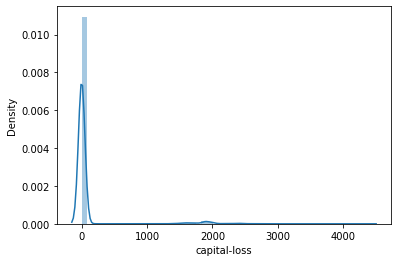

In [53]:
sns.distplot(adult_2['capital-loss'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


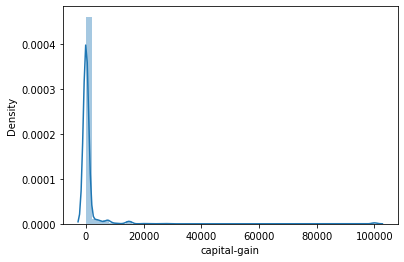

In [54]:
sns.distplot(adult_2['capital-gain'])

(array([3.1225e+04, 5.0900e+02, 8.5000e+01, 5.0000e+00, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.5200e+02]),
 array([    0. ,  9999.9, 19999.8, 29999.7, 39999.6, 49999.5, 59999.4,
        69999.3, 79999.2, 89999.1, 99999. ]),
 <a list of 10 Patch objects>)

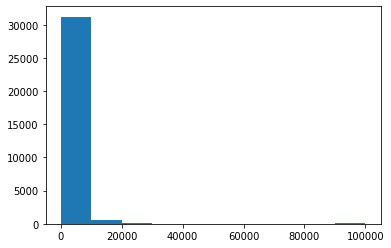

In [55]:
plt.hist(adult_2['capital-gain'])

(array([3.0506e+04, 1.7000e+01, 2.1000e+01, 4.4600e+02, 7.6600e+02,
        2.0100e+02, 1.2000e+01, 0.0000e+00, 6.0000e+00, 3.0000e+00]),
 array([   0. ,  435.6,  871.2, 1306.8, 1742.4, 2178. , 2613.6, 3049.2,
        3484.8, 3920.4, 4356. ]),
 <a list of 10 Patch objects>)

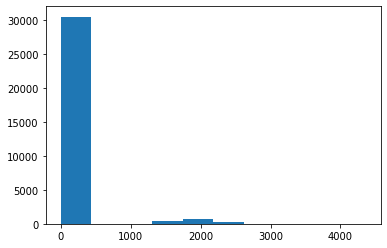

In [56]:
plt.hist(adult_2['capital-loss'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


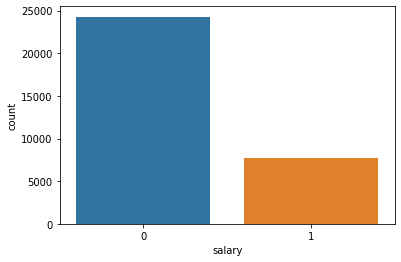

In [57]:
sns.countplot('salary',data = adult_2)

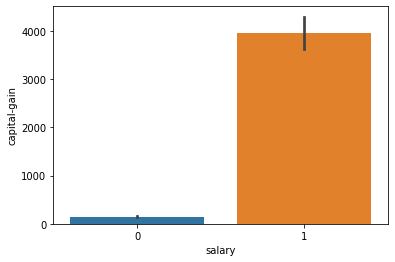

In [58]:
sns.barplot(y = 'capital-gain', x = 'salary',data = adult_2)

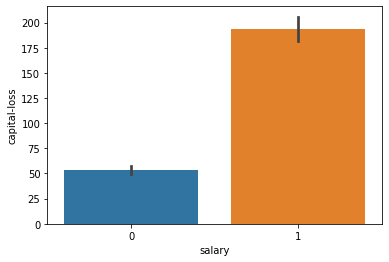

In [59]:
sns.barplot(y = 'capital-loss', x = 'salary',data = adult_2)

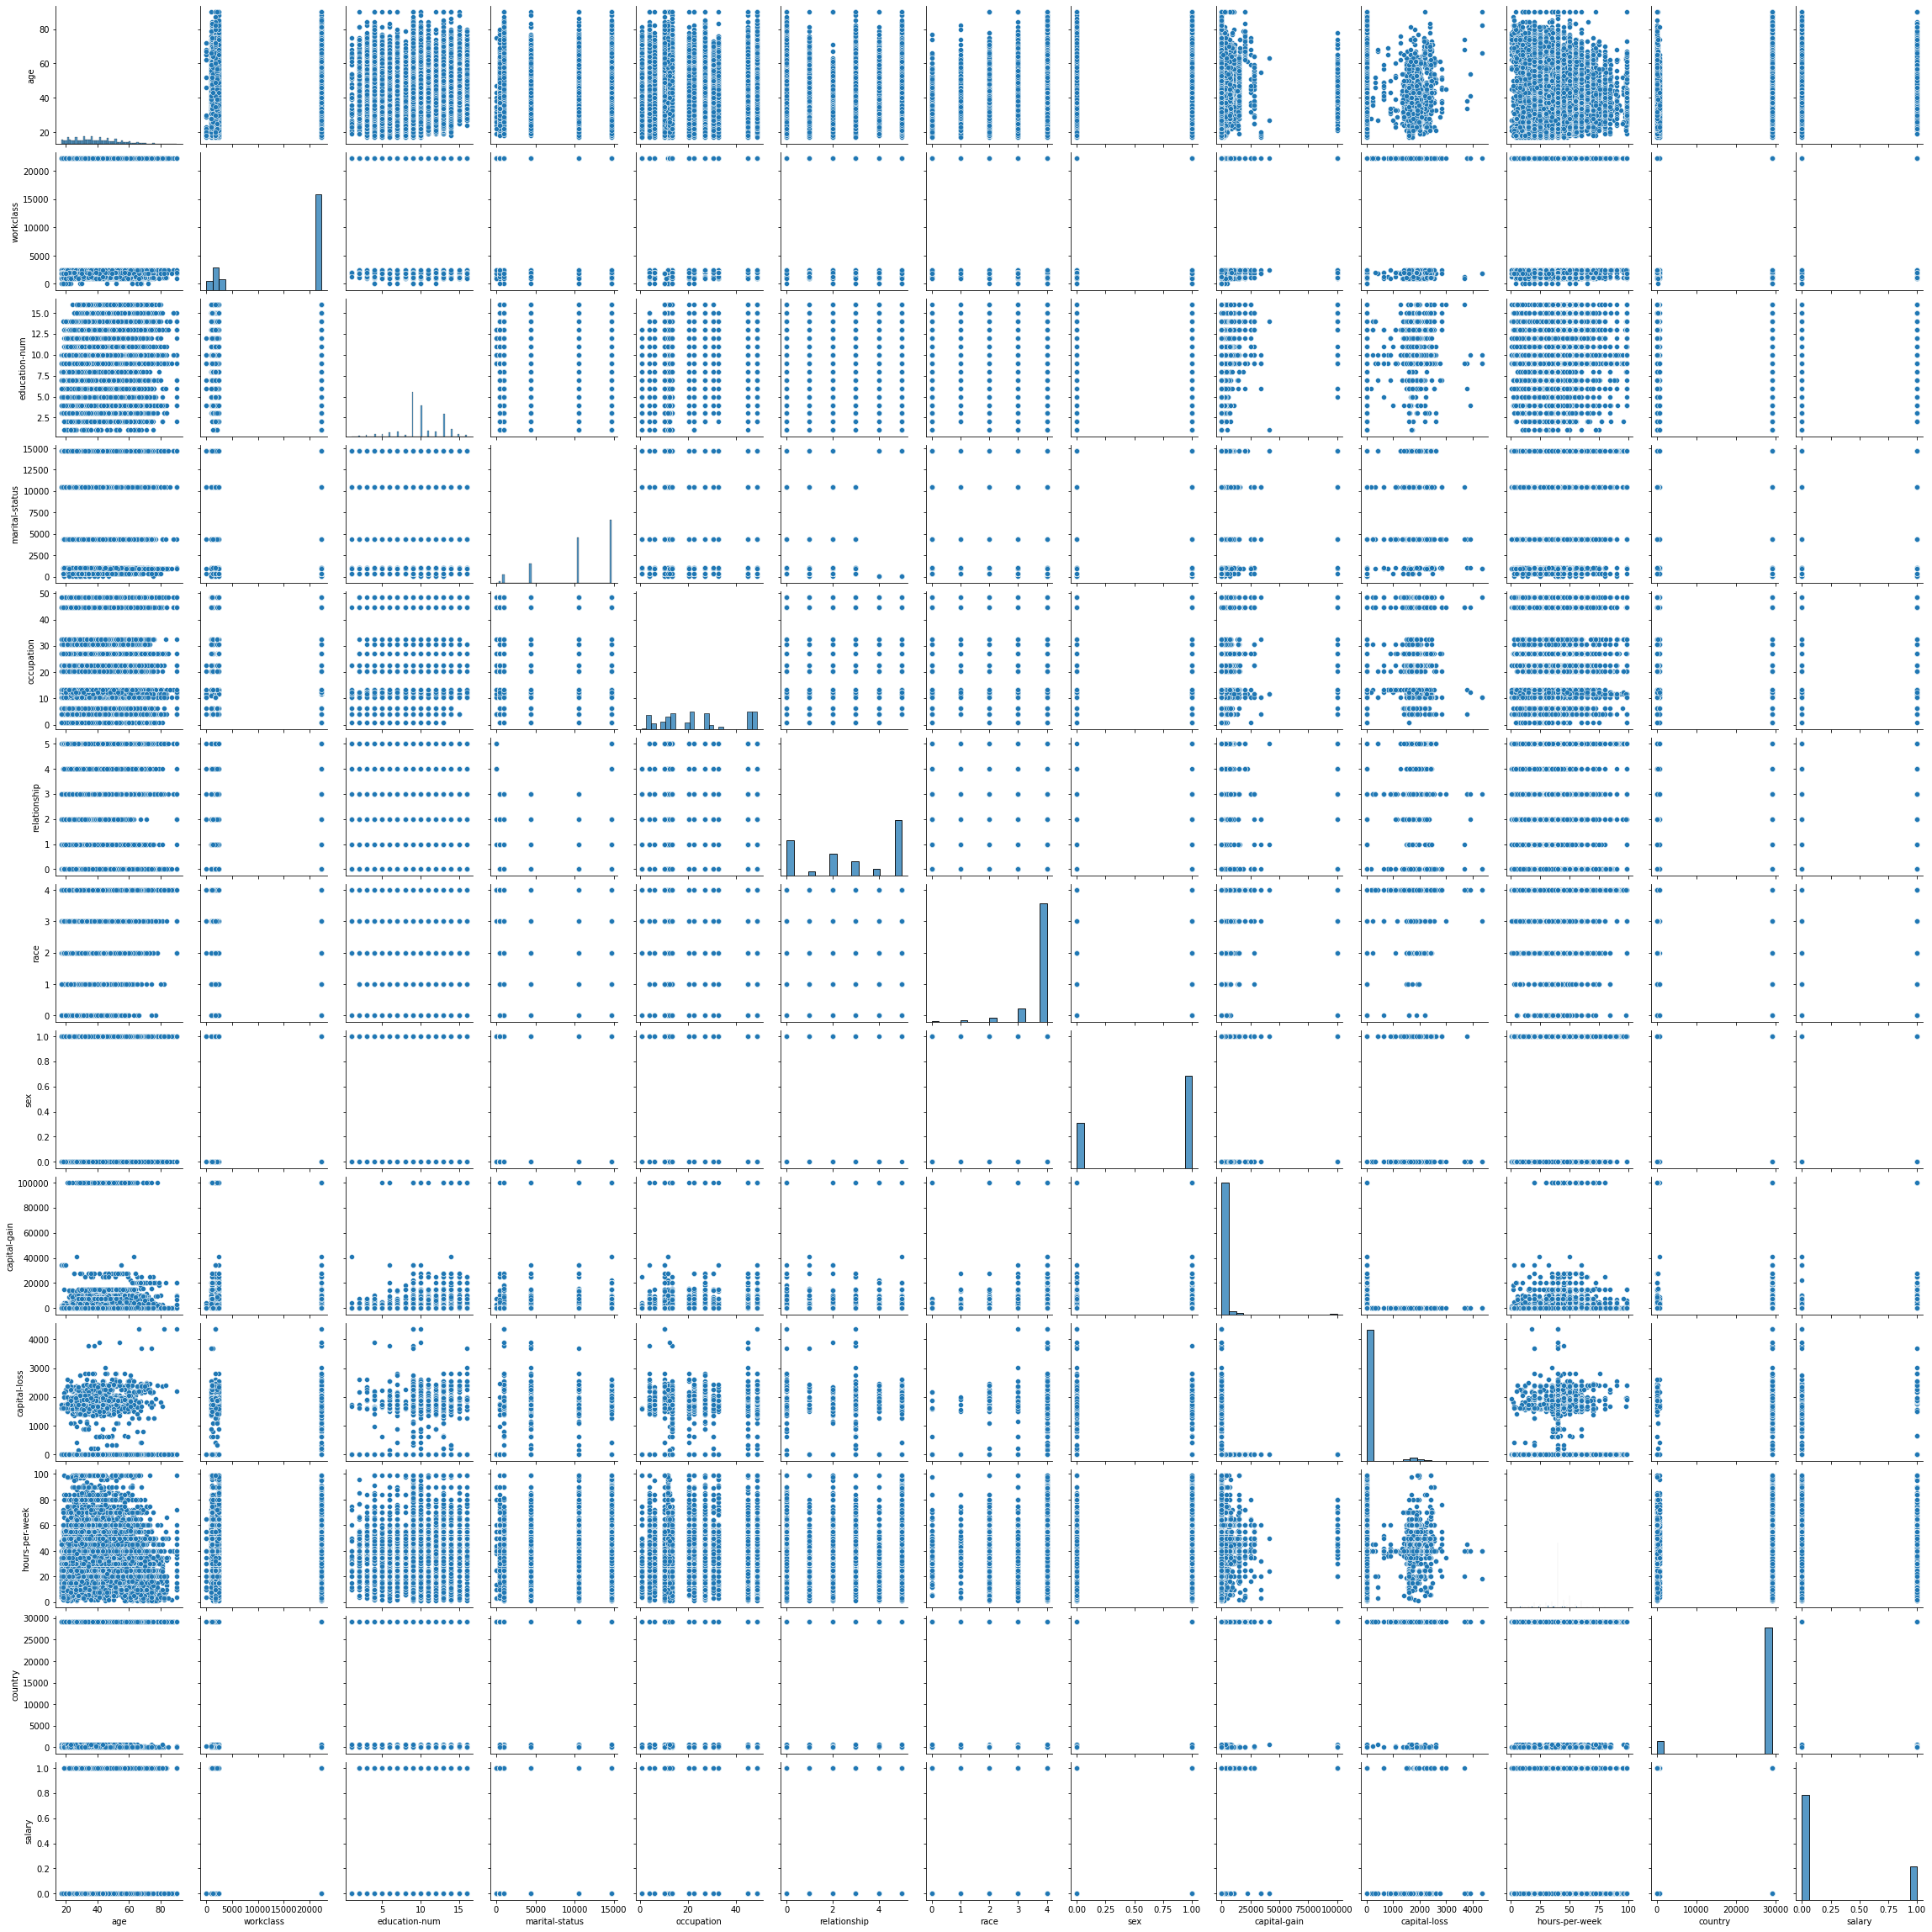

In [60]:
sns.pairplot(adult_2)


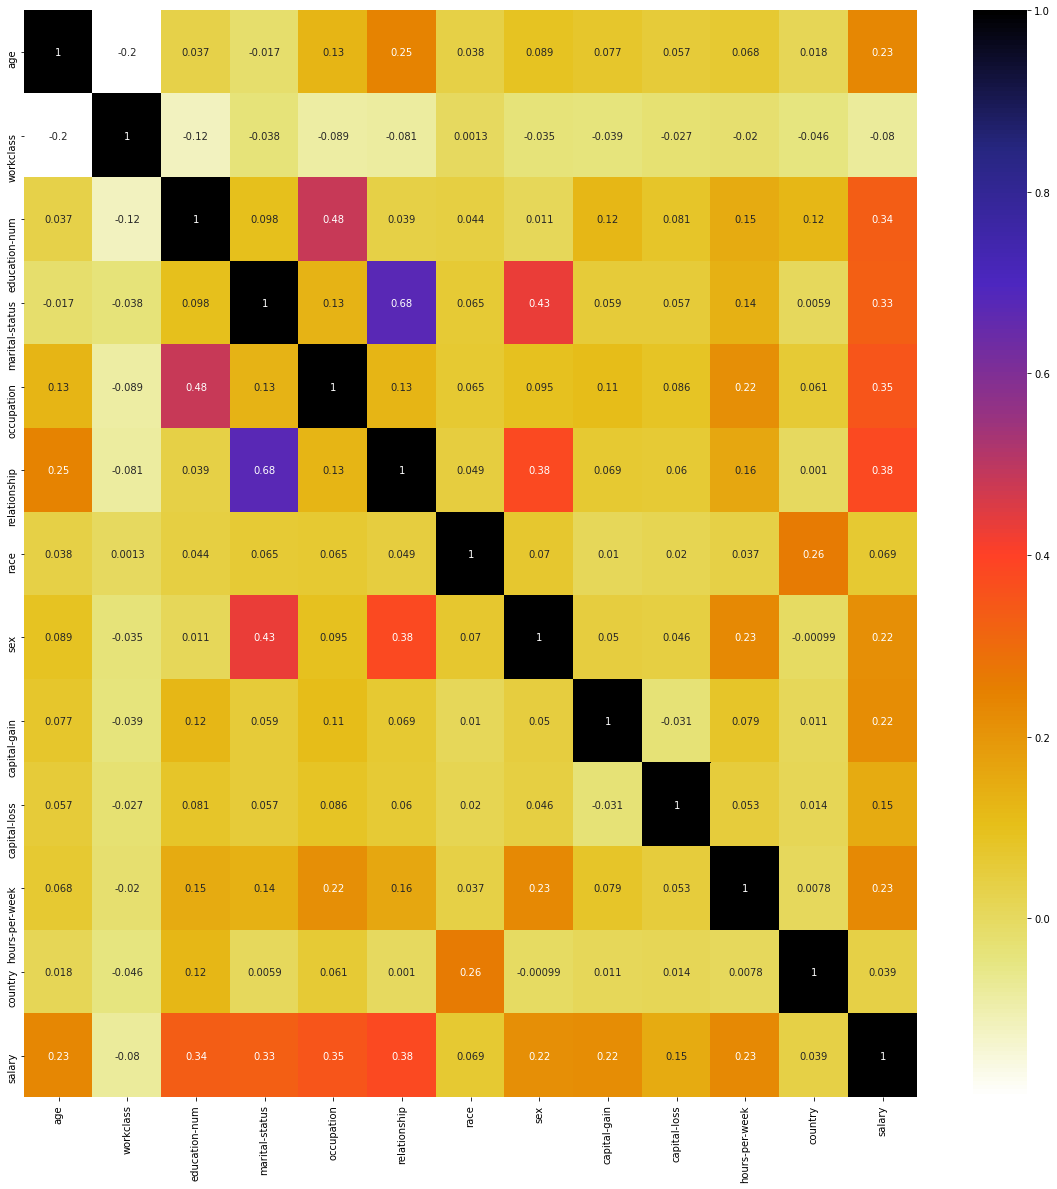

In [61]:
corr = adult_2.corr()
top_corr_fearures = corr.index
plt.figure(figsize = (20,20))
s=sns.heatmap(adult_2[top_corr_fearures].corr(),annot=True,cmap = "CMRmap_r")

#oversampling

In [62]:
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [63]:
os = SMOTE()

In [64]:
X = adult_2.drop(['salary'],axis = 1)
y = adult_2['salary']

In [65]:
X.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country
0,39,1279,13,10488,13.383499,0,4,1,2174,0,40,29170
1,50,2499,13,14692,48.522044,5,4,1,0,0,13,29170
2,38,22286,9,4394,6.148148,0,4,1,0,0,40,29170
3,53,22286,7,14692,6.148148,5,3,1,0,0,40,29170
4,28,22286,13,14692,44.848935,4,3,0,0,0,40,95


In [66]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: salary, dtype: int64

In [67]:
X.shape

(31978, 12)

In [68]:
y.shape

(31978,)

In [69]:
x_res,y_res = os.fit_resample(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [70]:
x_res.shape

(48566, 12)

In [71]:
y_res.shape

(48566,)

In [72]:
24283*2

48566

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
X_train,X_test,y_train,y_test = train_test_split(x_res,y_res,test_size = .20 , random_state = 42)

In [75]:
type(X_train)

numpy.ndarray

In [76]:
X_train 

array([[4.60000000e+01, 2.22860000e+04, 9.00000000e+00, ...,
        0.00000000e+00, 4.00000000e+01, 2.91700000e+04],
       [7.00000000e+01, 1.80900000e+03, 9.00000000e+00, ...,
        0.00000000e+00, 4.00000000e+01, 2.91700000e+04],
       [5.60000000e+01, 2.22860000e+04, 9.00000000e+00, ...,
        0.00000000e+00, 4.00000000e+01, 2.91700000e+04],
       ...,
       [3.74368352e+01, 2.22860000e+04, 7.00000000e+00, ...,
        0.00000000e+00, 4.00000000e+01, 2.91700000e+04],
       [2.30000000e+01, 2.22860000e+04, 9.00000000e+00, ...,
        0.00000000e+00, 7.00000000e+00, 2.91700000e+04],
       [5.40000000e+01, 2.22860000e+04, 1.00000000e+01, ...,
        0.00000000e+00, 6.00000000e+01, 2.91700000e+04]])

In [77]:
y_train

array([1, 0, 0, ..., 1, 0, 0])

In [78]:
X_train.shape

(38852, 12)

In [79]:
y_train.shape

(38852,)

#LogisticRegression


In [80]:
from sklearn.linear_model import LogisticRegression

In [81]:
lr = LogisticRegression(C=.7,solver = 'liblinear')

In [82]:
lr.fit(X_train,y_train)

LogisticRegression(C=0.7, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [83]:
lr.score(X_train,y_train)

0.7705909605683106

In [84]:
y_lr = lr.predict(X_test) 

In [85]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [86]:
print("acc:{}".format(accuracy_score(y_test,y_lr)))

acc:0.7704344245418983


In [87]:
cm_lr = confusion_matrix(y_test,y_lr)
cm_lr

array([[3680, 1167],
       [1063, 3804]])

In [88]:
TP = cm_lr[0][0]
FP = cm_lr[0][1]
FN = cm_lr[1][0]
TN = cm_lr[1][1]



In [89]:

import math
def mat_correlation(tp,fp,fn,tn):
  a = (tp*tn)-(fp*fn)
  b = math.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))
  return a/b
result =  mat_correlation(TP,FP,FN,TN)
print(result)

0.5409707018718417


#RandomForest

In [90]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]


In [91]:
param_grid = {'n_estimators' : n_estimators,
               'max_features' : max_features,
               'max_depth' : max_depth,
               'min_samples_split' : min_samples_split,
               'min_samples_leaf' : min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [92]:
from sklearn.ensemble import RandomForestClassifier
rf_Model = RandomForestClassifier()

In [93]:
from sklearn.model_selection import RandomizedSearchCV
rf_RandomGrid = RandomizedSearchCV(estimator = rf_Model, param_distributions = param_grid, cv = 10, verbose=2, n_jobs = -1)

In [94]:
rf_RandomGrid.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   26.5s finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

In [95]:
best_random_grid = rf_RandomGrid.best_estimator_


In [96]:
best_random_grid

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=17,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [97]:
from sklearn.metrics import accuracy_score
y_rf = best_random_grid.predict(X_test)
print(confusion_matrix(y_test,y_rf))
print("Accuracy Score {}".format(accuracy_score(y_test,y_rf)))


[[3673 1174]
 [ 493 4374]]
Accuracy Score 0.8283920115297508


In [98]:
cm_rf = confusion_matrix(y_test,y_rf)

In [99]:
cm_rf

array([[3673, 1174],
       [ 493, 4374]])

In [100]:
TP = cm_rf[0][0]
FP = cm_rf[0][1]
FN = cm_rf[1][0]
TN = cm_rf[1][1]


In [101]:
import math
def mat_correlation(tp,fp,fn,tn):
  a = (tp*tn)-(fp*fn)
  b = math.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))
  return a/b
result = mat_correlation(TP,FP,FN,TN)
print(result)

0.6632389345349249


#DecisionTree

In [102]:
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
  
# Creating the hyperparameter grid 
param_dist = {"max_depth" : [3, None],
              "max_features" : randint(1, 9),
              "min_samples_leaf" : randint(1, 9),
              "criterion": ["gini", "entropy"]}
  
# Instantiating Decision Tree classifier
tree = DecisionTreeClassifier()
  
# Instantiating RandomizedSearchCV object
tree_cv = RandomizedSearchCV(tree, param_dist, cv = 5)
  
tree_cv.fit(X_train,y_train)
  
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))


Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 7, 'min_samples_leaf': 5}
Best score is 0.8640995504024716


In [103]:
best_decision_tree = tree_cv.best_estimator_

In [104]:
best_decision_tree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=7, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [105]:
from sklearn.metrics import accuracy_score
y_dt=best_decision_tree.predict(X_test)
print(confusion_matrix(y_test,y_dt))
print("Accuracy Score {}".format(accuracy_score(y_test,y_dt)))

[[4275  572]
 [ 655 4212]]
Accuracy Score 0.8736874613959235


In [106]:
cm_dt = confusion_matrix(y_test,y_dt)

In [107]:
cm_dt

array([[4275,  572],
       [ 655, 4212]])

In [108]:
TP = cm_dt[0][0]
FP = cm_dt[0][1]
FN = cm_dt[1][0]
TN = cm_dt[1][1]

In [109]:
import math
def mat_correlation(tp,fp,fn,tn):
  a = (tp*tn)-(fp*fn)
  b = math.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))
  return a/b
result =  mat_correlation(TP,FP,FN,TN)
print(result)

0.7474918843227504


In [110]:
import pickle
pickle.dump(best_decision_tree,open('best_decision_tree.pkl','wb'))

#knn


In [111]:
from sklearn.preprocessing import StandardScaler

In [112]:
sc = StandardScaler()

In [113]:
X_train_s = sc.fit_transform(X_train)

In [114]:
X_test_s = sc.fit_transform(X_test)

In [115]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_s, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [116]:
y_knn = knn.predict(X_test_s)

In [117]:
from sklearn.metrics import accuracy_score
print("Accuracy Score {}".format(accuracy_score(y_test,y_knn)))

Accuracy Score 0.8529956763434219


In [118]:
cm_knn = confusion_matrix(y_test,y_knn)

In [119]:
cm_knn

array([[3984,  863],
       [ 565, 4302]])

In [120]:
TP = cm_knn[0][0]
FP = cm_knn[0][1]
FN = cm_knn[1][0]
TN = cm_knn[1][1]

In [121]:
import math
def mat_correlation(tp,fp,fn,tn):
  a = (tp*tn)-(fp*fn)
  b = math.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))
  return a/b
result =  mat_correlation(TP,FP,FN,TN)
print(result)

0.7072858201504867


#Naive

In [122]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

In [123]:
y_nb = nb.predict(X_test)

In [124]:
from sklearn.metrics import accuracy_score
print("Accuracy Score {}".format(accuracy_score(y_test,y_nb)))

Accuracy Score 0.7539633518632901


In [125]:
cm_nb = confusion_matrix(y_test,y_nb)

In [126]:
TP = cm_nb[0][0]
FP = cm_nb[0][1]
FN = cm_nb[1][0]
TN = cm_nb[1][1]

In [127]:
import math
def mat_correlation(tp,fp,fn,tn):
  a = (tp*tn)-(fp*fn)
  b = math.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))
  return a/b
result =  mat_correlation(TP,FP,FN,TN)
print(result)

0.5334277561346438


#Xbost

In [128]:
from xgboost import XGBClassifier

In [129]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}

In [130]:
xb = XGBClassifier()

In [131]:
xg_random = RandomizedSearchCV(xb,param_distributions = params,n_iter = 5,scoring = 'roc_auc',n_jobs = -1,cv = 5,verbose = 3)

In [132]:
xg_random.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   57.7s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                                           verbosity=1),
                   iid='deprecated', n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0

In [133]:
best_xg_random = xg_random.best_estimator_

In [134]:
y_boost = best_xg_random.predict(X_test)

In [135]:
from sklearn.metrics import accuracy_score
print("Accuracy Score {}".format(accuracy_score(y_test,y_boost)))

Accuracy Score 0.9100267654931027


In [136]:
cm_xb = confusion_matrix(y_test,y_boost)
cm_xb

array([[4433,  414],
       [ 460, 4407]])

In [137]:
TP = cm_xb[0][0]
FP = cm_xb[0][1]
FN = cm_xb[1][0]
TN = cm_xb[1][1]

In [138]:
import math
def mat_correlation(tp,fp,fn,tn):
  a = (tp*tn)-(fp*fn)
  b = math.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))
  return a/b
result =  mat_correlation(TP,FP,FN,TN)
print(result)

0.8200930567777514


In [139]:
import pickle
pickle.dump(best_xg_random,open('xbost_model.pkl','wb'))